In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Function for legible graphs (set dimensions and increase label font sizes)
def legible_graph(x, y):
    sns.set(rc={'figure.figsize':(x, y)})
    plt.rc('axes', titlesize=24) # Fontsize of title
    plt.rc('axes', labelsize=20) # Fontsize of x and y labels
    plt.rc('xtick', labelsize=16) # Fontsize of tick labels
    plt.rc('ytick', labelsize=16)
    plt.rc('legend', fontsize=14)

# Initial data processing
- Extracted countries of interest
- Transposed dataframe

In [3]:
# Load confirmed cases and deaths data
cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

# Examine general format
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24


In [4]:
# List of countries of interest and their population (in millions)
countries = ['US', 'China', 'Italy', 'Korea, South']
pops = [329.4, 1400, 62.3, 51.6] # Source: https://www.census.gov/popclock/

# Select only countries of interest
cases = cases[cases['Country/Region'].isin(countries)]
deaths = deaths[deaths['Country/Region'].isin(countries)]

cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,589,589,589,590,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,352,352,353,353,353,354,355,355,355,355
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139


In [5]:
# Combine China's data together
china_cases = cases[cases['Country/Region']=='China'].sum(axis=0)
china_deaths = deaths[deaths['Country/Region']=='China'].sum(axis=0)

# Fix string columns
china_cases['Province/State'] = np.NaN
china_cases['Country/Region'] = 'China'
china_deaths['Province/State'] = np.NaN
china_deaths['Country/Region'] = 'China'

# Dataframe of other countries with China readded and dropping unused columns
cases = cases[cases['Country/Region']!='China'].append(china_cases, ignore_index=True) \
                                               .drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths[deaths['Country/Region']!='China'].append(china_deaths, ignore_index=True) \
                                               .drop(['Province/State', 'Lat', 'Long'], axis=1)

# Transpose the dataframes
cases_transposed = cases.set_index('Country/Region').transpose()
deaths_transposed = deaths.set_index('Country/Region').transpose()

# Normalize by total population
for i in range(len(countries)):
    cases_transposed[countries[i]] = cases_transposed[countries[i]]/pops[i]
    deaths_transposed[countries[i]] = deaths_transposed[countries[i]]/pops[i]
    
# Remove column index name
del cases_transposed.columns.name
del deaths_transposed.columns.name

In [6]:
cases_transposed.to_csv(r'time_series_covid19_confirmed_selected_normalized.csv')
cases_transposed.head()

,Italy,"Korea, South",US,China
1/22/20,0.0,0.01938,0.003036,0.391429
1/23/20,0.0,0.01938,0.003036,0.459286
1/24/20,0.0,0.03876,0.006072,0.657143
1/25/20,0.0,0.03876,0.006072,1.004286
1/26/20,0.0,0.05814,0.015179,1.482143


In [7]:
deaths_transposed.to_csv(r'time_series_covid19_deaths_selected_normalized.csv')
deaths_transposed.head()

,Italy,"Korea, South",US,China
1/22/20,0.0,0.0,0.0,0.012143
1/23/20,0.0,0.0,0.0,0.012857
1/24/20,0.0,0.0,0.0,0.018571
1/25/20,0.0,0.0,0.0,0.030000
1/26/20,0.0,0.0,0.0,0.040000


# Initial exploratory data analysis
- Cases and deaths over time on linear scale
- Cases and deaths over time on log scale

Text(0, 0.5, 'Number of people')

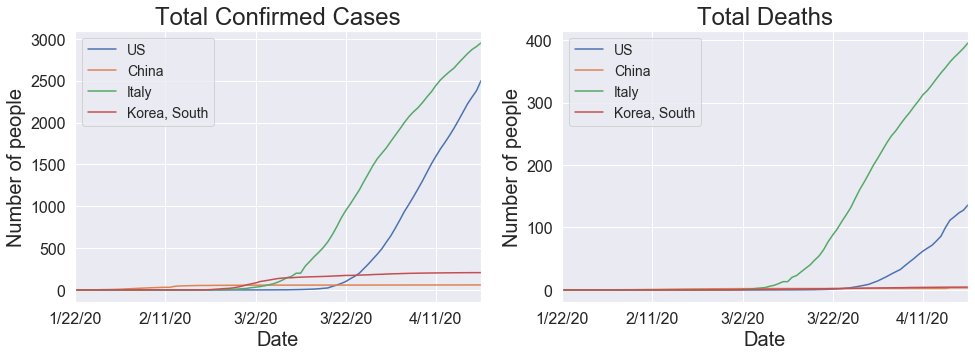

In [8]:
# Figure settings
legible_graph(16, 5)

# Change order of countries
cases_transposed = cases_transposed[countries]
deaths_transposed = deaths_transposed[countries]

# Plot total cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
cases_transposed.plot(ax=plt.gca())
plt.title('Total Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
deaths_transposed.plot(ax=plt.gca())
plt.title('Total Deaths')
plt.xlabel('Date')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

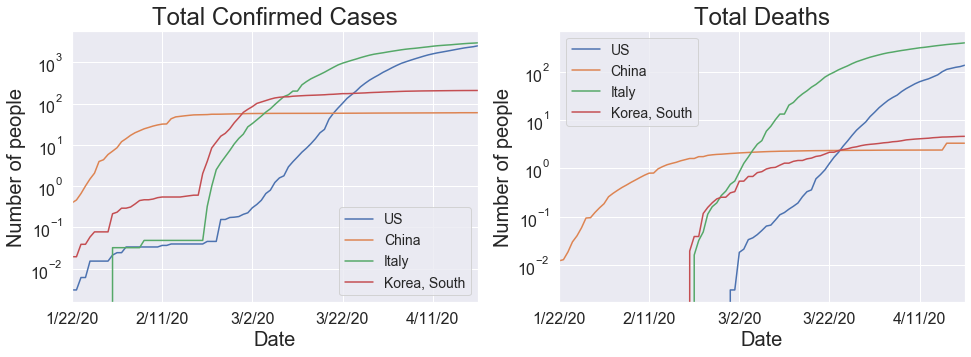

In [9]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
cases_transposed.plot(logy=True, ax=plt.gca())
plt.title('Total Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
deaths_transposed.plot(logy=True, ax=plt.gca())
plt.title('Total Deaths')
plt.xlabel('Date')
plt.ylabel('Number of people')

# Plots with x-axis set to days since 1 death/million
- Total cases and deaths over time on log scale with x-axis shifted to day of 1 death/million
- Dates for 1 death/million: China: 1/28/20, Italy: 3/4/20, Iran: 3/5/20, US: 3/17/20

In [10]:
# Find date for 1 death/million
# countries = ['US', 'China', 'Iran', 'Italy'] (specified before)
index_1 = []
date_1 = []

# Reset index, which will be used as proxy for day
deaths_reset = deaths_transposed.reset_index().rename(columns={'index':'Date'})
cases_reset = cases_transposed.reset_index().rename(columns={'index':'Date'})

# Find first date where number of deaths is 1 death/million or more
for country in countries:
    index = deaths_reset[deaths_reset[country]>=1].index[0]
    index_1.append(index)
    date_1.append(deaths_reset.iloc[index]['Date'])

# Show the date for 1 death/million deaths for each country
print([countries[i] + ': ' + date_1[i] for i in range(len(countries))])

['US: 3/22/20', 'China: 2/14/20', 'Italy: 3/3/20', 'Korea, South: 3/9/20']


In [11]:
# New dataframes for data shifted to new index
cases_shifted = cases_reset.reset_index()
cases_shifted = cases_shifted[['index']]
deaths_shifted = deaths_reset.reset_index()
deaths_shifted = deaths_shifted[['index']]

for i in range(len(countries)):
    # Temporary dataframe with all indices shifted
    temp = cases_reset[countries[i]].shift(-index_1[i])
    temp2 = deaths_reset[countries[i]].shift(-index_1[i])
    
    # Join the dataframes
    cases_shifted = cases_shifted.join(temp, how='inner')
    deaths_shifted = deaths_shifted.join(temp2, how='inner')

cases_shifted = cases_shifted.drop('index', axis=1)
deaths_shifted = deaths_shifted.drop('index', axis=1)
deaths_shifted.head()

,US,China,Italy,"Korea, South"
0,1.265938,1.086429,1.268058,1.027132
1,1.690953,1.187857,1.717496,1.046512
2,2.143291,1.261429,2.375602,1.162791
3,2.859745,1.331429,3.162119,1.279070
4,3.670310,1.430714,3.739968,1.279070


Text(0, 0.5, 'Number of people (per million)')

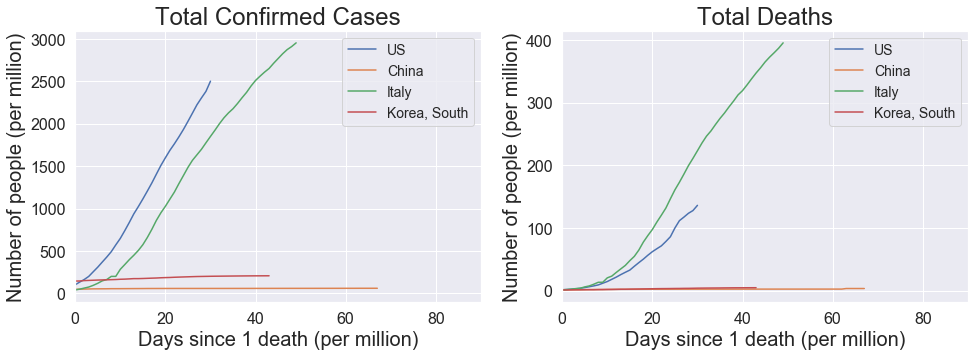

In [12]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
cases_shifted.plot(ax=plt.gca())
plt.title('Total Confirmed Cases')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
deaths_shifted.plot(ax=plt.gca())
plt.title('Total Deaths')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

Text(0, 0.5, 'Number of people (per million)')

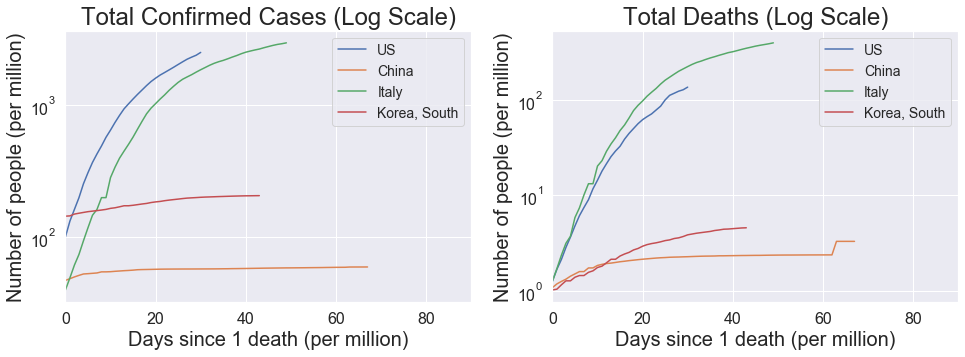

In [13]:
# Figure settings
legible_graph(16, 5)

# Plot total cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
cases_shifted.plot(logy=True, ax=plt.gca())
plt.title('Total Confirmed Cases (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
deaths_shifted.plot(logy=True, ax=plt.gca())
plt.title('Total Deaths (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

# What about deaths per day?
- Daily cases and deaths over time on log scales
- Daily cases and deaths with a 7-day moving average

In [14]:
# Calculate deaths per day by calculating difference with previous row
daily_cases = cases_reset.drop('Date', axis=1).diff()
daily_deaths = deaths_reset.drop('Date', axis=1).diff()

# New dataframes for daily data (with x-axis shifted to days since 1 death/million)
daily_cases_shifted = daily_cases.reset_index()
daily_cases_shifted = daily_cases_shifted[['index']]
daily_deaths_shifted = daily_deaths.reset_index()
daily_deaths_shifted = daily_deaths_shifted[['index']]

for i in range(len(countries)):
    # Temporary dataframe with all indices shifted
    temp = daily_cases[countries[i]].shift(-index_1[i])
    temp2 = daily_deaths[countries[i]].shift(-index_1[i])
    
    # Join the dataframes
    daily_cases_shifted = daily_cases_shifted.join(temp, how='inner')
    daily_deaths_shifted = daily_deaths_shifted.join(temp2, how='inner')

daily_cases_shifted = daily_cases_shifted.drop('index', axis=1)
daily_deaths_shifted = daily_deaths_shifted.drop('index', axis=1)
daily_deaths_shifted.head()

,US,China,Italy,"Korea, South"
0,0.333940,0.108571,0.433387,0.058140
1,0.425015,0.101429,0.449438,0.019380
2,0.452338,0.073571,0.658106,0.116279
3,0.716454,0.070000,0.786517,0.116279
4,0.810565,0.099286,0.577849,0.000000


Text(0, 0.5, 'Number of people (per million)')

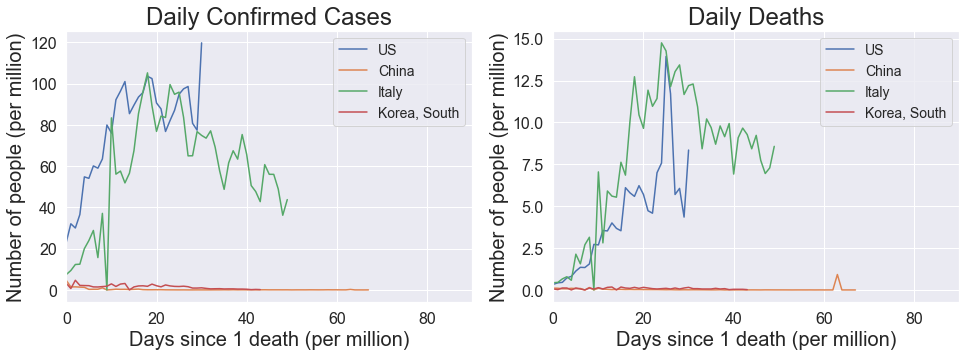

In [15]:
# Figure settings
legible_graph(16, 5)

# Plot daily cases and deaths over time on linear scale
plt.subplot(1, 2, 1)
daily_cases_shifted.plot(ax=plt.gca())
plt.title('Daily Confirmed Cases')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
daily_deaths_shifted.plot(ax=plt.gca())
plt.title('Daily Deaths')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

Text(0, 0.5, 'Number of people (per million)')

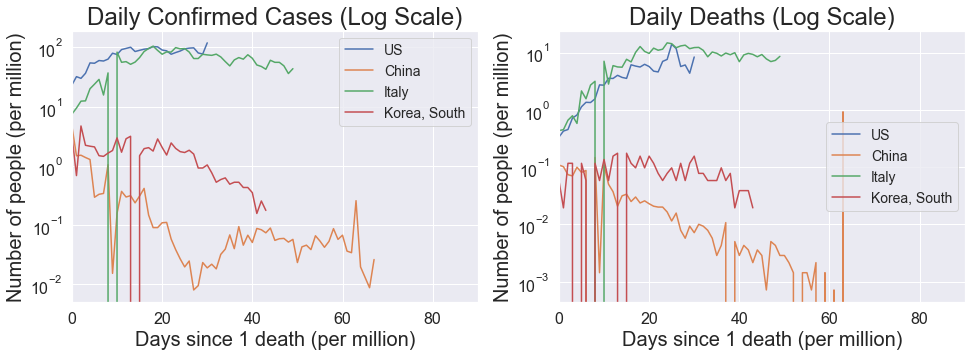

In [16]:
# Figure settings
legible_graph(16, 5)

# Plot daily cases and deaths over time on log scale
plt.subplot(1, 2, 1)
daily_cases_shifted.plot(logy=True, ax=plt.gca())
plt.title('Daily Confirmed Cases (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
daily_deaths_shifted.plot(logy=True, ax=plt.gca())
plt.title('Daily Deaths (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

Text(0, 0.5, 'Number of people (per million)')

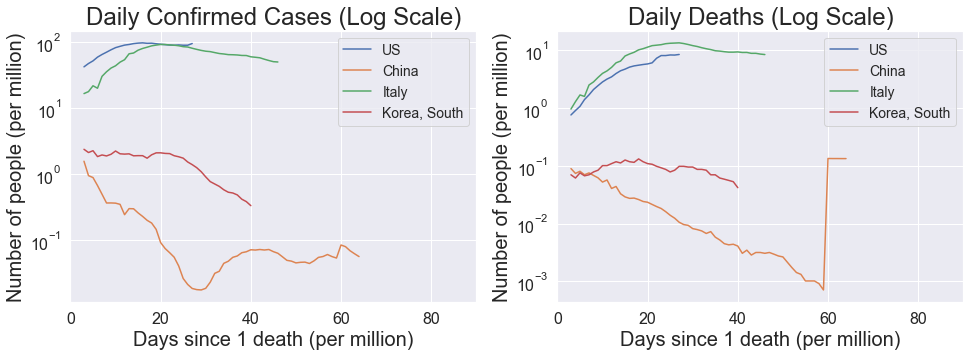

In [17]:
# Smooth out data with moving average
n_days = 7
smoothed_daily_cases = daily_cases_shifted.rolling(n_days, center=True).sum()/n_days
smoothed_daily_deaths = daily_deaths_shifted.rolling(n_days, center=True).sum()/n_days

# Figure settings
legible_graph(16, 5)

# Plot smoothed daily cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
smoothed_daily_cases.plot(logy=True, ax=plt.gca())
plt.title('Daily Confirmed Cases (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
smoothed_daily_deaths.plot(logy=True, ax=plt.gca())
plt.title('Daily Deaths (Log Scale)')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

# What about change in deaths per day?
- Change in daily cases and deaths over time on log scales
- Change in daily cases and deaths with 7-day moving average

Text(0, 0.5, 'Number of people (per million)')

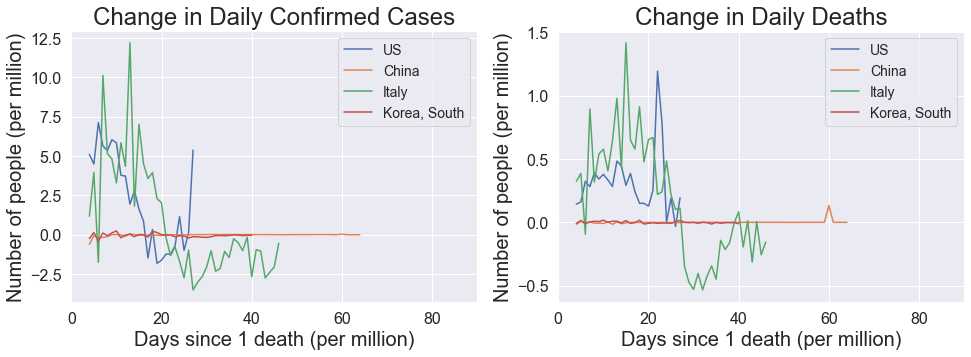

In [18]:
# Calculate change in deaths per day by calculating difference with previous row
delta_daily_cases = smoothed_daily_cases.diff()
delta_daily_deaths = smoothed_daily_deaths.diff()

# Figure settings
legible_graph(16, 5)

# Plot change in daily cases and deaths over time on logy scale
plt.subplot(1, 2, 1)
delta_daily_cases.plot(ax=plt.gca())
plt.title('Change in Daily Confirmed Cases')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')

plt.subplot(1, 2, 2)
delta_daily_deaths.plot(ax=plt.gca())
plt.title('Change in Daily Deaths')
plt.xlabel('Days since 1 death (per million)')
plt.ylabel('Number of people (per million)')